Title: Billboard Hot 100 Analysis Slug: billboard_hot_100_analysis Summary: What genres and artists are most correlated in rankings? Date: 2016-11-23 12:00 Category: Articles Tags: Authors: Nate Hall

Here is some open ended analysis using pandas to show the power of this library for handling literally anything that can be thrown at it.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Pandas to read in data

In [52]:
data = pd.read_csv('./data/billboard.csv')
df = pd.DataFrame(data)
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Renaming column names

In [53]:
df.columns = [col.replace('.week', '') for col in df.columns]
df.columns = [col.replace('x', '') for col in df.columns]
df.columns = [col.replace('st', '') for col in df.columns]
df.columns = [col.replace('nd', '') for col in df.columns]
df.columns = [col.replace('rd', '') for col in df.columns]
df.columns = [col.replace('th', '') for col in df.columns]
#df.columns = ufo.columns.str.replace(' ', '_')

### Describe your data: check the value counts + descrisptive stats

In [54]:
#We will first drop 'year' since all the songs are from 2000
df.drop('year', axis=1, inplace=True)
#basic describe
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,67,68,69,70,71,72,73,74,75,76
count,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,244.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,45.786885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,28.152357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,81.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,91.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df2 = pd.melt(df, id_vars=['arti.inverted', 'track', 'time', 'genre', 'date.entered','date.peaked'], 
                  var_name='week', value_name='rank')

In [56]:
#checking function that was run
print df2.shape
print df2.columns

(24092, 8)
Index([u'arti.inverted', u'track', u'time', u'genre', u'date.entered',
       u'date.peaked', u'week', u'rank'],
      dtype='object')


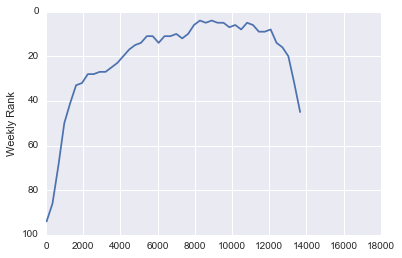

In [57]:
#We now the data formated to plot ranking over time for each track.
#We will use other methods to determine which tracks to plot.
df3 = df2[df2['track'] == 'I Wanna Know']
plt.plot(df3['rank'])
plt.ylabel('Weekly Rank')
plt.axis([0,18000,100, 0])
plt.show()

#### Future Exploratory options... the world is yours with pandas.
- Look at time it takes to get to the top. (time entered, to time peak)
- Also add a column called time in top 100.
- Compare the three columns.

### That was interesting... now lets wrangle this dataset for some cool correlations.

# Data wrangling for the most correlated genres

In [58]:
#create a new dataframe for manipulation.
df7 = df2

### Group the data

In [59]:
df7 = df7.groupby(['week' , 'genre'], as_index=False).mean()
#check that the group by function worked.
df7.head()

,week,genre,rank
0,1,Country,82.405405
1,1,Electronica,84.500000
2,1,Gospel,76.000000
3,1,Jazz,89.000000
4,1,Latin,73.222222


### Create a pivot table

In [60]:
#Use the pivot table function to get to something that can be correlated.
df7 = df7.pivot(index='week', columns='genre', values='rank')

In [61]:
#Moving the week column from the index back into a column position on the data table.
df7.reset_index(inplace=True)
df7.head(5)

genre,week,Country,Electronica,Gospel,Jazz,Latin,Pop,R&B,Rap,Reggae,Rock
0,1,82.405405,84.500000,76.0,89.0,73.222222,79.222222,84.086957,85.172414,72.0,76.116788
1,10,52.377049,55.750000,59.0,NaN,43.250000,43.571429,63.866667,53.380952,75.0,35.895238
2,11,51.016949,53.250000,66.0,NaN,49.625000,50.142857,62.538462,52.538462,84.0,36.048077
3,12,50.714286,59.750000,68.0,NaN,35.285714,58.250000,67.000000,50.000000,92.0,33.734694
4,13,52.301887,49.333333,61.0,NaN,39.285714,58.333333,59.666667,53.235294,85.0,34.125000


In [62]:
#Sorting the data inside week after it is converted to a string.
df7['week'] = df7.week.astype(int)
df7.sort('week')
df7.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


genre,week,Country,Electronica,Gospel,Jazz,Latin,Pop,R&B,Rap,Reggae,Rock
0,1,82.405405,84.500000,76.0,89.0,73.222222,79.222222,84.086957,85.172414,72.0,76.116788
1,10,52.377049,55.750000,59.0,NaN,43.250000,43.571429,63.866667,53.380952,75.0,35.895238
2,11,51.016949,53.250000,66.0,NaN,49.625000,50.142857,62.538462,52.538462,84.0,36.048077
3,12,50.714286,59.750000,68.0,NaN,35.285714,58.250000,67.000000,50.000000,92.0,33.734694
4,13,52.301887,49.333333,61.0,NaN,39.285714,58.333333,59.666667,53.235294,85.0,34.125000


In [63]:
#Remove the pesky column and index names that will mess up the correlation formula later.
df7.index.name = None
df7.columns.name = None

In [64]:
#Remove the week column since we sorted by it already.
df7.drop('week', inplace=True, axis=1)

In [65]:
df7.head()

,Country,Electronica,Gospel,Jazz,Latin,Pop,R&B,Rap,Reggae,Rock
0,82.405405,84.500000,76.0,89.0,73.222222,79.222222,84.086957,85.172414,72.0,76.116788
1,52.377049,55.750000,59.0,NaN,43.250000,43.571429,63.866667,53.380952,75.0,35.895238
2,51.016949,53.250000,66.0,NaN,49.625000,50.142857,62.538462,52.538462,84.0,36.048077
3,50.714286,59.750000,68.0,NaN,35.285714,58.250000,67.000000,50.000000,92.0,33.734694
4,52.301887,49.333333,61.0,NaN,39.285714,58.333333,59.666667,53.235294,85.0,34.125000


# Data wrangling for the most correlated artist rankings

In [66]:
df8 = df2

### Group the data

In [67]:
df8 = df8.groupby(['week' , 'arti.inverted'], as_index=False).mean()
df8.shape

(17328, 3)

In [68]:
df8 = df8[np.isfinite(df8['rank'])]
df8.shape

(3989, 3)

In [69]:
counts = df8['arti.inverted'].value_counts()

In [70]:
##Removing any artists that have less than 15 datapoints on the rankings.
df8 = df8[df8['arti.inverted'].isin(counts[counts > 30].index)]

### Create a pivot table

In [71]:
df8 = df8.pivot(index='week', columns='arti.inverted', values='rank')

In [72]:
#Moving the week column from the index back into a column position on the data table.
df8.reset_index(inplace=True)

In [73]:
#Sorting the data inside week after it is converted to a string.
df8['week'] = df8.week.astype(int)
df8.sort('week')
df8.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


arti.inverted,week,3 Doors Down,Aaliyah,"Anthony, Marc",BBMak,"Braxton, Toni",Creed,Destiny's Child,"Hill, Faith",Joe,"Jordan, Montell",Lonestar,Nelly,Pink,Savage Garden,Vertical Horizon,matchbox twenty
0,1,78.5,71.5,79.5,99.0,79.0,82.5,78.333333,82.0,85.5,92.0,82.666667,100.0,55.0,73.0,67.0,60.0
1,10,56.0,23.0,44.5,18.0,21.0,65.5,12.333333,49.0,53.0,24.0,33.333333,36.0,11.5,16.5,22.5,12.0
2,11,56.0,23.0,43.0,19.0,27.0,63.5,10.333333,42.0,52.5,24.0,33.000000,37.0,10.0,19.0,20.0,8.0
3,12,55.0,22.5,43.5,15.0,29.0,68.0,7.666667,46.0,54.5,20.0,31.666667,30.0,11.0,22.5,19.0,6.0
4,13,54.0,22.0,50.0,18.0,32.0,70.5,2.666667,55.5,54.0,19.0,35.000000,23.0,12.0,25.0,19.0,1.0


In [74]:
#Remove the pesky column and index names that will mess up the correlation formula later.
df8.index.name = None
df8.columns.name = None

In [75]:
#Remove the week column since we sorted by it already.
df8.drop('week', inplace=True, axis=1)

# Data wrangling for the most correlated song rankings

How would you do this part?

In [76]:
#df9 = df2

## Run a correlation function on the dataframes from the wrangling steps.
This is a simple formula that I have been working to improve to work on any data set. It is designed to be a useful alternative to the spray and pray sns.pairplot or scatter matrix methods.
sns.pairplot (on df7) = 14s
corrr_pairs function (on df7) =384ms

In [77]:
def corr_pairs(df_input,coef_percentile): #,mse_percentile
    #from sklearn.metrics import mean_squared_error
    #Get top correlated pairs using Pearson coefficient
    c = df_input.corr()
    s = c.unstack()
    so = s.sort_values(kind="quicksort")
    df_output = pd.DataFrame(so.abs(), columns=['coef'])
    df_output = df_output.reset_index()
    df_output.drop_duplicates('coef', inplace=True)
    df_output.dropna(inplace=True)
    #df_input = df_input.fillna(0.0)
    #Get mean squared error for better accuracy
    #mse_l = []
    #for i in range(len(df_output.iloc[:,0:2])):
        #mse_var = mean_squared_error(df_input[df_output.iloc[i,0]], df_input[df_output.iloc[i,1]])
        #mse_l.append(mse_var)
    #df_output['mse'] = mse_l
    #Filter the results by both Coefficient and MSE for best pairs.
    df_output = df_output[(df_output['coef'] < 1) & (df_output.coef > np.percentile(df_output['coef'],coef_percentile))] #& (df_output.mse < np.percentile(df_output['mse'],mse_percentile))]
    #Plot the best pairs.
    for i in range(len(df_output.iloc[:,0:2])):
        colors = ['r', 'b']
        plt.scatter(df_output.iloc[i,0],df_output.iloc[i,1], data=df_input, c=colors)
        plt.xlabel(df_output.iloc[i,0])
        plt.ylabel(df_output.iloc[i,1])
        plt.legend()
        plt.show()
    return df_output

## Showing the most correlated genres in the rankings

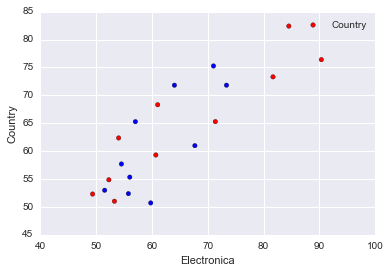

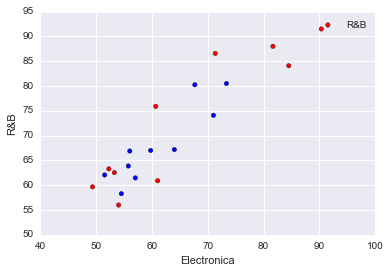

,level_0,level_1,coef
86,Electronica,Country,0.848179
88,Electronica,R&B,0.913870


In [78]:
corr_pairs(df7, 95)

## Showing the most correlated artists in the rankings

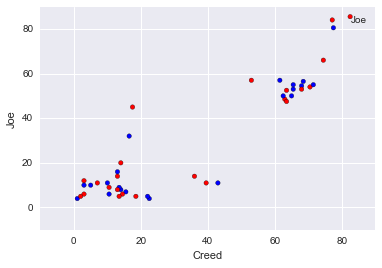

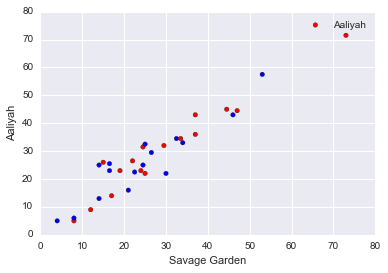

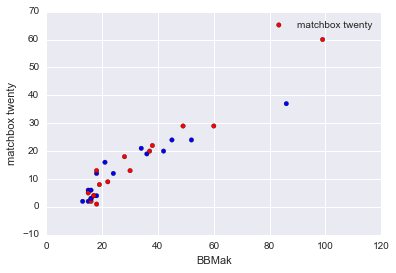

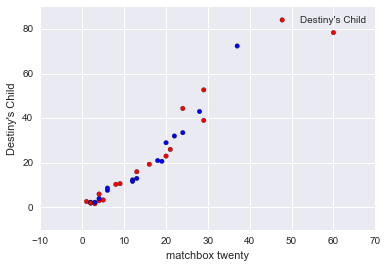

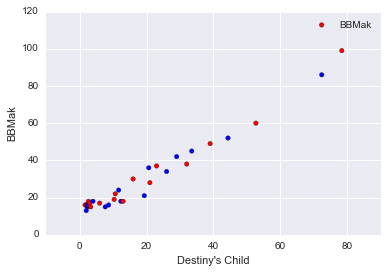

,level_0,level_1,coef
230,Creed,Joe,0.909992
232,Savage Garden,Aaliyah,0.949246
234,BBMak,matchbox twenty,0.954013
236,matchbox twenty,Destiny's Child,0.965130
238,Destiny's Child,BBMak,0.982112


In [79]:
corr_pairs(df8, 95)

## Showing the most correlated songs in the rankings

How would you do this part?